# Table 2: Predictive Ability with RMSE
Models to test:  
* Light GBM
* Stacking all models
* Stacking top 5 models 
* XGB
* Voting top 5
* Gradient Boosting
* Decision Tree
* Voting all
* Multilayer Perceptron (NN)
* Random Forest
* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic net
* SVM

    Note: we are using the conda env S1_2023
    Certain packages that are required can be found in requirements.txt

In [22]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor

import pickle

import warnings
warnings.filterwarnings("ignore")

In [3]:
x_train = pd.read_excel('data/final_train.xlsx')
y_train = pd.read_excel('data/y_train.xlsx')
x_test = pd.read_excel('data/final_test.xlsx')

x_train.drop(columns = 'ID', inplace= True)
x_test.drop(columns = 'ID', inplace= True)
y_train.drop(columns = 'ID', inplace= True)

print(x_train.shape, y_train.shape)
print(x_test.shape)

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

(7000, 171) (7000, 1)
(3000, 171)


## Full Train Set RMSE testing

In [6]:
lr = LinearRegression()
las = Lasso()
rdg = Ridge()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
dtr = DecisionTreeRegressor()
nnr = MLPRegressor()
rfr = RandomForestRegressor()
from sklearn.metrics import mean_squared_error

estimators = [[lr, 'lin reg'], [las, 'lasso'], 
              [rdg, 'ridge'], [gbr, 'grad boost'], 
              [dtr, 'decision tree'], [nnr, 'percep'], 
              [rfr, 'random forest'], [xgb, 'XGBoost']]
              #, [lgbm, 'lgbm']]

for est in estimators:
    est[0].fit(x_train.fillna(0), y_train)
    rmse = mean_squared_error(est[0].predict(x_train.fillna(0)), y_train)**1/2
    print(f'{est[1]} RMSE = {rmse}')

lin reg RMSE = 22036.266922295785
lasso RMSE = 23016.642249172713
ridge RMSE = 22073.317329392765
grad boost RMSE = 9707.500941811591
decision tree RMSE = 0.0
percep RMSE = 192778026.1853187
random forest RMSE = 2524.2059679857143
XGBoost RMSE = 704.1915330193206


In [24]:
for est in estimators:
    scores = cross_val_score(estimator = est[0] , 
                    X = x_train.fillna(0), 
                    y = y_train, 
                    cv = 5, 
                    scoring='neg_root_mean_squared_error')
    print(f'{est[1]} scores: {scores}, mean rmse = {scores.mean()}, std of rmse = {scores.std()}\n')

lin reg scores: [-215.452884 -215.301071 -1057627.736378 -223.165436 -211.126922], mean rmse = -211698.55653815492, std of rmse = 422964.5899376025/n
lasso scores: [-217.078779 -215.444896 -234.297529 -225.822171 -208.604964], mean rmse = -220.24966767240562, std of rmse = 8.912179082996298/n
ridge scores: [-214.443187 -214.751245 -1092168.466804 -222.894479 -210.760347], mean rmse = -218606.2632126959, std of rmse = 436781.1018138959/n
grad boost scores: [-188.065231 -178.964327 -201.664435 -181.259987 -182.304030], mean rmse = -186.4516019390751, std of rmse = 8.176167594435112/n
decision tree scores: [-337.220970 -262.354963 -279.171005 -247.105419 -334.888388], mean rmse = -292.1481488129333, std of rmse = 37.26439322354597/n
percep scores: [-294.959408 -257.172057 -3514719.623609 -307.078058 -722729.936209], mean rmse = -847661.753868379, std of rmse = 1362566.739345786/n
random forest scores: [-198.679871 -185.214992 -206.062717 -193.263846 -192.186074], mean rmse = -195.08149979

In [30]:
xg_fi = pd.DataFrame({
    'name':xgb.feature_names_in_,
    'importance':xgb.feature_importances_
})
xg_fi.sort_values('importance')

,name,importance
133,sub_Palm_Beach,0.000000
104,sub_Botany_Bay,0.000000
102,sub_Rockdale,0.000000
140,sub_Haymarket,0.000000
150,sub_Newport,0.000000
...,...,...
70,amen_prem_park,0.029351
167,room_type_Private room,0.039943
74,amen_pool,0.051405
10,bathrooms,0.067985


In [35]:
pd.set_option('display.max_columns', None)
x_train

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_year,host_has_not_accepted_before,has_not_been_reviewed_before,host_has_not_replied_before,host_single_listing,license_exempt_flag,PID_license_flag,host_joined_after_covid_flag,first_rev_after_covid_flag,host_is_pro_managed,host_neigh_provided,walkscore,verf_cnt,has_facebook,has_jumio,has_email,has_review,has_phone,has_google,has_govt,unique_prop_type,budget_prop_type,highp_amen_cnt,pop_amen_cnt,lowp_amen_cnt,amenities_cnt,amen_prem_park,amen_ind_fireplace,amen_bathtub,amen_private_patio,amen_pool,amen_cable,amen_bbq,amen_hottub,amen_bbg_gear,amen_child_toys,amen_high_chair,amen_beach_ess,amen_st_park,amen_lug_dropoff,amen_bedlock,amen_lockbox,amen_elevator,amen_singlev,amen_kettle,amen_hostgreet,highp_amen_prop,sub_Sydney,sub_Waverley,sub_Randwick,sub_Pittwater,sub_Manly,sub_Warringah,sub_North_Sydney,sub_Woollahra,sub_Marrickville,sub_Leichhardt,sub_Sutherland_Shire,sub_Rockdale,sub_Hornsby,sub_Botany_Bay,sub_Ryde,sub_Mosman,sub_Parramatta,sub_Auburn,sub_Willoughby,sub_Canada_Bay,sub_The_Hills_Shire,sub_Ku-Ring-Gai,sub_Burwood,sub_Blacktown,sub_Penrith,sub_Lane_Cove,sub_Canterbury,sub_City_Of_Kogarah,sub_Ashfield,sub_Bankstown,sub_Liverpool,sub_Hurstville,sub_Fairfield,sub_Strathfield,sub_Campbelltown,sub_Camden,sub_Holroyd,sub_Hunters_Hill,sub_Surry_Hills,sub_Bondi_Beach,sub_Coogee,sub_Bondi,sub_Palm_Beach,sub_Alexandria,sub_Wolli_Creek,sub_Potts_Point,sub_Chatswood,sub_Newtown,sub_Northern_Beaches,sub_Haymarket,sub_Pyrmont,sub_Forest_Lodge,sub_Waterloo,sub_North_Bondi,sub_Millers_Point,sub_Rhodes,sub_North_Curl_Curl,sub_Kirribilli,sub_Narrabeen,sub_Newport,description_length,desc_beach,desc_amen,desc_view,desc_lux,desc_transport,desc_sentiment,neigh_sentiment,host_about_sentiment,host_response_time_a few days or more,host_response_time_no response time,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,dist,hway_dist
0,4854,1.0,0.69,1,2,1,1,-33.80084,151.26378,6,3.0,3,3,2,22,2,2,22,22,2.0,22.0,1,0,14,14,174,3,1,0,2620.0,643.0,4.67,4.33,4.33,4.67,4.33,4.67,4.33,0,2,2,0,0,0.04,2009,0,0,0,0,1,0,0,0,0,0,83,6,0,1,1,1,1,0,1,1,0,2,19,2,29,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,949,1,1,0,1,1,0.8932,0.1027,0.9201,0,0,0,1,0,1,0,0,0,0.931,15.029
1,4841,1.0,1.00,0,3,1,1,-33.87964,151.21680,2,1.0,1,1,2,90,2,2,90,90,2.0,90.0,1,5,31,61,336,383,18,6,4029.0,458.0,4.42,4.58,4.40,4.77,4.67,4.70,4.47,1,1,0,1,0,3.21,2009,0,0,0,0,0,1,0,0,0,0,98,9,1,1,1,1,1,0,1,0,0,2,20,4,40,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0.05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,935,0,1,1,1,1,0.9821,0.9678,0.9972,0,0,0,0,1,0,0,1,0,1.622,8.070
2,4503,1.0,0.81,1,1,1,1,-33.81748,151.23484,4,1.0,1,1,2,90,2,2,90,90,2.0,90.0,1,1,9,33,217,297,15,4,4450.0,461.0,4.55,4.66,4.23,4.87,4.90,4.73,4.68,0,1,1,0,0,2.23,2010,0,0,0,1,0,1,0,0,0,0,77,7,1,1,1,

In [14]:
est = DecisionTreeRegressor(max_depth=10)

est.fit(x_train.fillna(0), y_train)
preds = est.predict(x_train.fillna(0)).tolist()
preds = pd.Series([i for i in preds]) # add[0]

residuals = pd.DataFrame({
    'pred':preds,
    'true':y_train['price']
})

residuals['error'] = residuals['pred'] - residuals['true']
print(residuals.sort_values('error').head())
print((residuals['error']**2).mean()**1/2)

            pred  true        error
2773  180.740206  1300 -1119.259794
2807  280.809524  1357 -1076.190476
4679  227.965217  1050  -822.034783
4739  180.740206   999  -818.259794
3591  190.127660  1000  -809.872340
4455.803611058128


In [27]:
residuals['mape'] = round(residuals['error']/residuals['true'], 2)
residuals['mape'].mean()

0.13563571428571428

<AxesSubplot: xlabel='true', ylabel='error'>

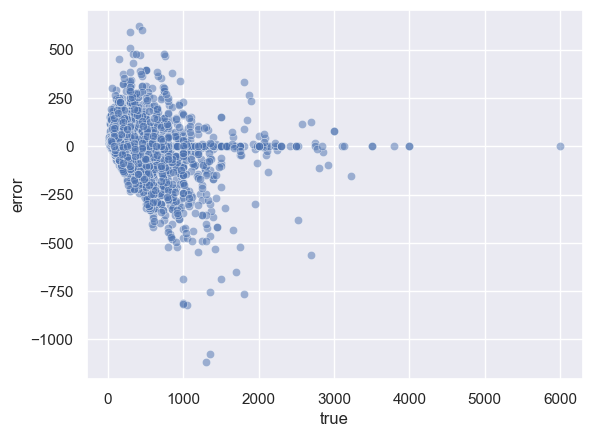

In [23]:
#sns.scatterplot(x = residuals.index, y = residuals['error'])
sns.scatterplot(x = residuals['true'], y = residuals['error'], alpha = 0.5)
# model is guessing less than true price most of the time

# Table 2: Predictive Ability with MAE

Repeat same as above but different evaluation metric